In [2]:
import numpy as np 
import pandas as pd 


In [6]:
# Read the CSV files
df1 = pd.read_csv('8b_results.csv')
df2 = pd.read_csv('70b_results.csv')
df3 = pd.read_csv('405b_results.csv')

In [ ]:
attributes = ['Clarity', 'Grammar and Syntax', 'Tone Appropriateness', 'Sentence Structure and Flow', 'Engagement', 'Conciseness']

In [ ]:
from scipy.stats import ttest_ind

stats_df1 = df1[attributes].agg(['mean', 'median', 'std'])
stats_df2 = df2[attributes].agg(['mean', 'median', 'std'])
stats_df3 = df3[attributes].agg(['mean', 'median', 'std'])

print("Statistics for df1:\n", stats_df1)
print("\nStatistics for df2:\n", stats_df2)
print("\nStatistics for df3:\n", stats_df3)

ttest_results = {}
for attribute in attributes:
    ttest_results[attribute] = {
        'df1_vs_df2': ttest_ind(df1[attribute], df2[attribute]),
        'df1_vs_df3': ttest_ind(df1[attribute], df3[attribute]),
        'df2_vs_df3': ttest_ind(df2[attribute], df3[attribute])
    }

print("\nT-test results:")
for attribute, tests in ttest_results.items():
    print(f"\nAttribute: {attribute}")
    for comparison, result in tests.items():
        print(f"{comparison}: statistic={result.statistic}, pvalue={result.pvalue}")

Statistics for df1:
          Clarity  Grammar and Syntax  Tone Appropriateness  \
mean    6.850000            7.510000              8.060000   
median  7.000000            8.000000              8.000000   
std     0.783349            1.184879              1.052366   

        Sentence Structure and Flow  Engagement  Conciseness  
mean                       6.430000    6.210000     5.582418  
median                     7.000000    6.000000     6.000000  
std                        1.249283    0.769297     0.817393  

Statistics for df2:
          Clarity  Grammar and Syntax  Tone Appropriateness  \
mean    6.540000            7.070000              7.960000   
median  7.000000            7.000000              8.000000   
std     1.274616            1.327677              0.973591   

        Sentence Structure and Flow  Engagement  Conciseness  
mean                       6.040000    5.980000     4.800000  
median                     7.000000    6.000000     5.000000  
std               

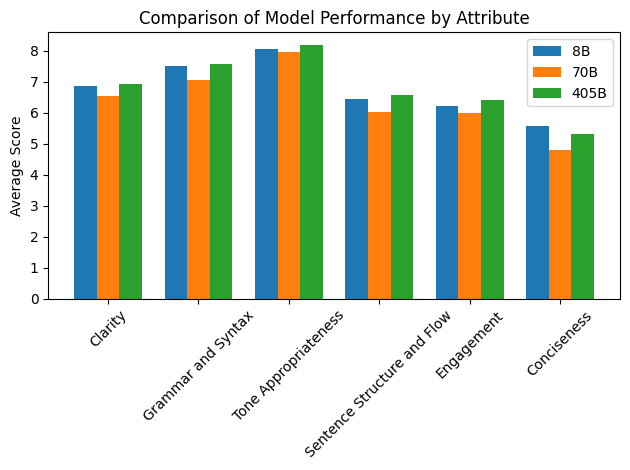

In [15]:
import matplotlib.pyplot as plt
import numpy as np

attributes = ['Clarity', 'Grammar and Syntax', 'Tone Appropriateness', 'Sentence Structure and Flow', 'Engagement', 'Conciseness']
means_8b = df1[attributes].mean()
means_70b = df2[attributes].mean()
means_405b = df3[attributes].mean()

x = np.arange(len(attributes))
width = 0.25

plt.bar(x - width, means_8b, width, label='8B')
plt.bar(x, means_70b, width, label='70B')
plt.bar(x + width, means_405b, width, label='405B')

plt.xticks(x, attributes, rotation=45)
plt.ylabel('Average Score')
plt.title('Comparison of Model Performance by Attribute')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
means_8b , means_70b , means_405b

(Clarity                        6.850000
 Grammar and Syntax             7.510000
 Tone Appropriateness           8.060000
 Sentence Structure and Flow    6.430000
 Engagement                     6.210000
 Conciseness                    5.582418
 dtype: float64,
 Clarity                        6.54
 Grammar and Syntax             7.07
 Tone Appropriateness           7.96
 Sentence Structure and Flow    6.04
 Engagement                     5.98
 Conciseness                    4.80
 dtype: float64,
 Clarity                        6.92
 Grammar and Syntax             7.57
 Tone Appropriateness           8.19
 Sentence Structure and Flow    6.58
 Engagement                     6.42
 Conciseness                    5.33
 dtype: float64)

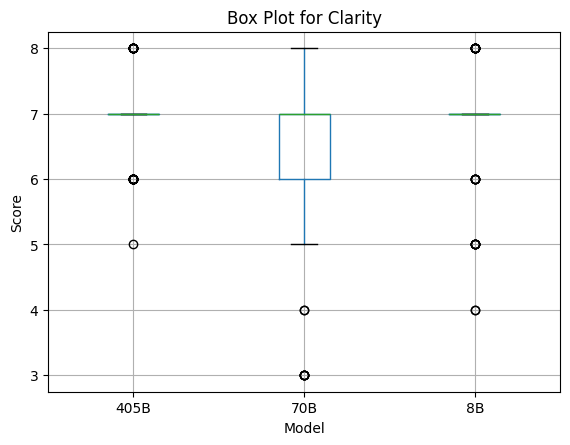

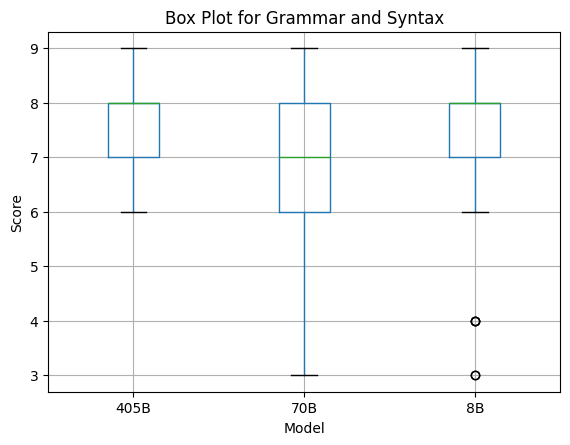

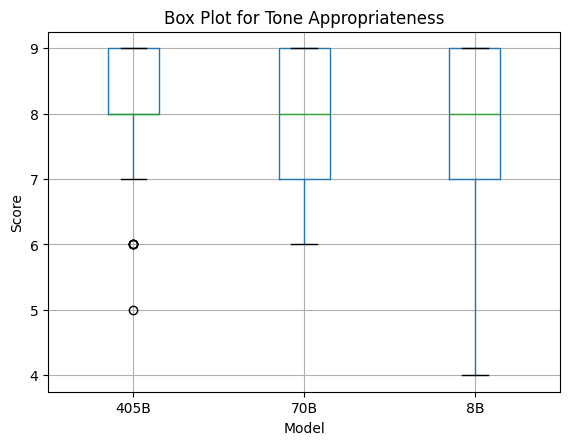

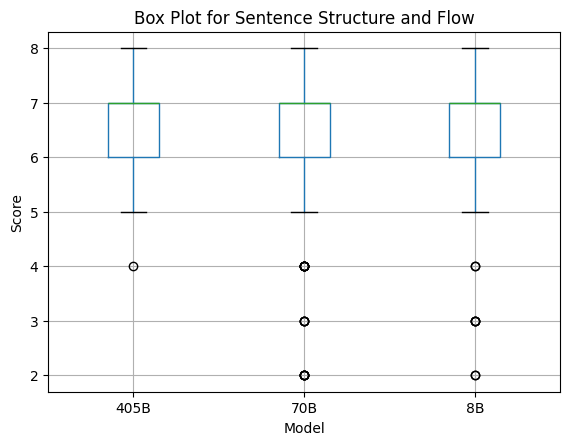

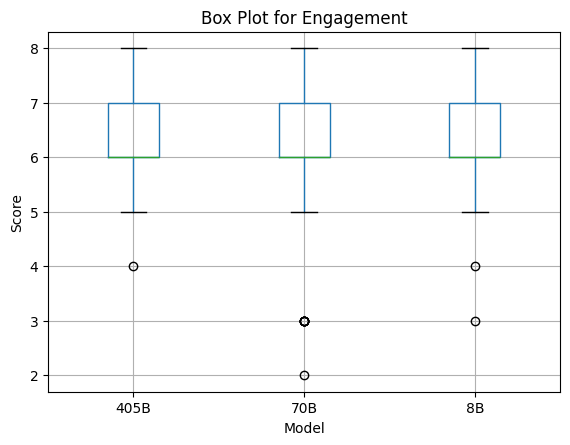

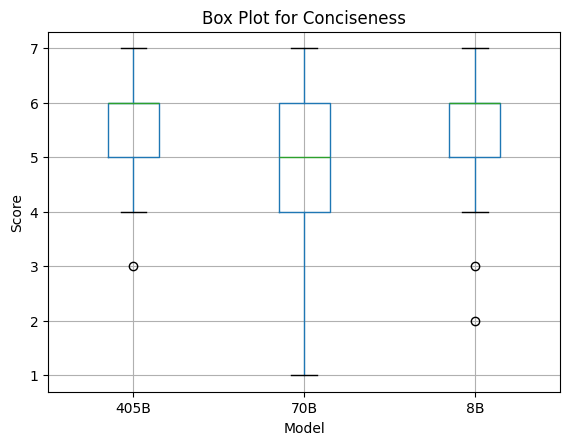

In [16]:
df_combined = pd.concat([df1.assign(Model='8B'), df2.assign(Model='70B'), df3.assign(Model='405B')])

for attribute in attributes:
    df_combined.boxplot(column=attribute, by='Model')
    plt.title(f'Box Plot for {attribute}')
    plt.suptitle('')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.show()


In [18]:
from scipy.stats import f_oneway
import numpy as np

for attribute in attributes:
    # Filter out rows with NaN values for the current attribute across all models
    valid_indices = ~np.isnan(df1[attribute]) & ~np.isnan(df2[attribute]) & ~np.isnan(df3[attribute])
    
    # Apply the F-test on filtered data
    f_stat, p_val = f_oneway(df1[attribute][valid_indices], 
                             df2[attribute][valid_indices], 
                             df3[attribute][valid_indices])
    print(f'{attribute}: F-stat={f_stat}, p-value={p_val}')


Clarity: F-stat=4.727495621716288, p-value=0.009525283380441365
Grammar and Syntax: F-stat=6.288571347404903, p-value=0.0021142333915398145
Tone Appropriateness: F-stat=1.3769651758636319, p-value=0.2539493561593208
Sentence Structure and Flow: F-stat=4.923492137995777, p-value=0.007878374299460025
Engagement: F-stat=5.873463721367033, p-value=0.003150213889906632
Conciseness: F-stat=12.138829298191846, p-value=8.951045174297677e-06


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for attribute in attributes:
    valid_data = pd.DataFrame({
        'score': pd.concat([df1[attribute], df2[attribute], df3[attribute]], ignore_index=True),
        'model': ['8B'] * len(df1) + ['70B'] * len(df2) + ['405B'] * len(df3)
    }).dropna()  # Remove NaN rows
    
    tukey_result = pairwise_tukeyhsd(valid_data['score'], valid_data['model'])
    print(f"\nPost-hoc results for {attribute}:\n")
    print(tukey_result)



Post-hoc results for Clarity:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  405B    70B    -0.38 0.0115 -0.6898 -0.0702   True
  405B     8B    -0.07 0.8556 -0.3798  0.2398  False
   70B     8B     0.31 0.0499  0.0002  0.6198   True
----------------------------------------------------

Post-hoc results for Grammar and Syntax:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  405B    70B     -0.5 0.0037 -0.8627 -0.1373   True
  405B     8B    -0.06 0.9197 -0.4227  0.3027  False
   70B     8B     0.44 0.0127  0.0773  0.8027   True
----------------------------------------------------

Post-hoc results for Tone Appropriateness:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------

In [20]:
from scipy.stats import ttest_ind

for attribute in attributes:
    t_stat, p_val = ttest_ind(df1[attribute].dropna(), df2[attribute].dropna())
    print(f'{attribute} (8B vs 70B): t-stat={t_stat}, p-value={p_val}')


Clarity (8B vs 70B): t-stat=2.072068995455478, p-value=0.03955459743436817
Grammar and Syntax (8B vs 70B): t-stat=2.4725865425756695, p-value=0.01425691324031465
Tone Appropriateness (8B vs 70B): t-stat=0.697520109477583, p-value=0.4862955996454468
Sentence Structure and Flow (8B vs 70B): t-stat=1.9345510806601498, p-value=0.054470481351100594
Engagement (8B vs 70B): t-stat=1.6578336738527333, p-value=0.09893451052942114
Conciseness (8B vs 70B): t-stat=4.202468435001755, p-value=4.068033691918486e-05
